# CASE STUDY 2 (MARKETING ANALYSIS)

# NAME-ARBAJ SIKANDAR SHAIKH

DOMAIN-RETAIL  (MARKETING ANALYSIS)

PROJECT -Retail Analysis with Ghodawat_retail_store_sales Data

One of the leading retail stores in india, Ghodawat_retail_store, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Ghodawat_retail_store_sales. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [46]:
data=pd.read_csv(r"C:\Users\Arbaj\Desktop\UNIVERCITY\Ghodawat_retail_store_sales.csv")

In [47]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [49]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [50]:
data.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [51]:
data["Date"]=pd.to_datetime(data["Date"])

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [53]:
data["Date_index"]=data["Date"]
data=data.set_index(data["Date_index"])

In [54]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Date_index
Date_index,,,,,,,,,
2010-05-02,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010-05-02
2010-12-02,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010-12-02
2010-02-19,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19
2010-02-26,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26
2010-05-03,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010-05-03


# Q1. Which store has maximum sales?

In [55]:
pd.DataFrame(data.groupby(["Store"])["Weekly_Sales"].sum().sort_values(ascending=False))[:1]

,Weekly_Sales
Store,
20,3.013978e+08


<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

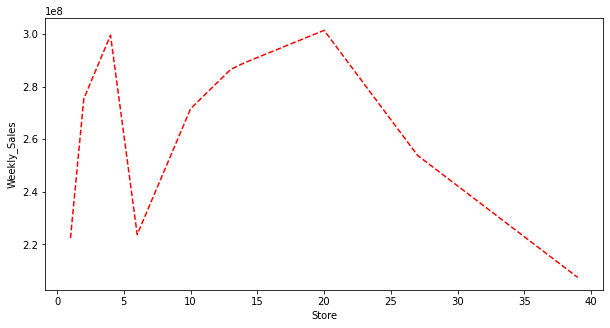

In [56]:
data1=data.groupby(["Store"])["Weekly_Sales"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.lineplot(data=data1,color="r",linestyle="--")

# Q2. Which store has maximum standard deviation?

In [57]:
pd.DataFrame(data.groupby(["Store"])["Weekly_Sales"].std().sort_values(ascending=False))[:1]

,Weekly_Sales
Store,
14,317569.949476


# Monthly view of sales in unit

In [61]:
pd.DataFrame(data.groupby(['Month'])["Weekly_Sales"].agg(sum))

KeyError: 'Month'

# For Store 1 – Build  prediction models to forecast demand

In [ ]:
data_store1=data[data["Store"]==1]
data_store1

In [ ]:
data_store1=data_store1.drop(columns=["Date","Date_index","Year","Semester","Quarter","Month"],axis=1)
data_store1

In [ ]:
x=data_store1.drop(columns=["Weekly_Sales"],axis=1)
y=data_store1["Weekly_Sales"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test=train_test_split(x,y,train_size=0.70,random_state=25)

In [ ]:
x_train.shape

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

In [ ]:
y_train_pred=model.predict(x_train)
y_train_pred

In [ ]:
y_test_pred=model.predict(x_test)
y_test_pred

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
mean_squared_error(y_pred=y_train_pred,y_true=y_train)

In [ ]:
mean_squared_error(y_pred=y_test_pred,y_true=y_test)

In [ ]:
r2_score(y_pred=y_train_pred,y_true=y_train)

In [ ]:
r2_score(y_pred=y_test_pred,y_true=y_test)

# RESULT

1) 20 number store has maximum sales.

2) store 14 has maximum standard deviation.The sales vary a lot.

3) Monthly view of sales in unit

In [ ]:
pd.DataFrame(data.groupby(["Month"])["Weekly_Sales"].agg(sum))